In [2]:
%matplotlib notebook
"""
This scripts compares the validation data with the ones obtained
  with edgelist_perco_t, namely
  - get_nb_components
  - get_size_largest_perco_component
  - get_size_second_largest_perco_component

Copyright (C) 2020  Antoine Allard (antoineallard.info)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans',
                                   'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.fontsize"] = "xx-small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 5
plt.rcParams["lines.markeredgewidth"] = 2

### Loads the validation data

These data have been generated by running the script `generate_validation_data.py`.

In [4]:
header = open("validation_raw_results.dat", 'r').readline().replace('#', ' ').split()
df = pd.read_csv("validation_raw_results.dat", comment='#', sep='[ \s]{2,}', engine='python', names=header)
df["frac_edges"] = df["nb_edges"] / df["nb_edges"].max()
df["frac_size_1st"] = df["size_1st"] / df["nb_vertices"].max()
df["frac_size_2nd"] = df["size_2nd"] / df["nb_vertices"].max()
df

,nb_vertices,nb_edges,size_1st,size_2nd,nb_comp,frac_edges,frac_size_1st,frac_size_2nd
0,250,611,249,1,2,1.000000,0.996,0.004
1,250,610,249,1,2,0.998363,0.996,0.004
2,250,609,249,1,2,0.996727,0.996,0.004
3,250,608,249,1,2,0.995090,0.996,0.004
4,250,607,249,1,2,0.993453,0.996,0.004
...,...,...,...,...,...,...,...,...
15295,250,4,2,2,246,0.006547,0.008,0.008
15296,250,3,2,2,247,0.004910,0.008,0.008
15297,250,2,2,2,248,0.003273,0.008,0.008
15298,250,1,2,1,249,0.001637,0.008,0.004


### Compiles the validation data into the observables that will be plotted

In [5]:
def perc95(series):
    return np.percentile(series, 95)

def perc05(series):
    return np.percentile(series,  5)

pt = pd.pivot_table(df, aggfunc=[np.mean, np.median, perc05, perc95],
                    values=['nb_comp', 'frac_size_2nd','frac_size_1st'], index=['frac_edges'])
pt

mean                              median                \
           frac_size_1st frac_size_2nd nb_comp frac_size_1st frac_size_2nd   
frac_edges                                                                   
0.000000         0.00400         0.004  250.00         0.004         0.004   
0.001637         0.00800         0.004  249.00         0.008         0.004   
0.003273         0.00800         0.008  248.00         0.008         0.008   
0.004910         0.00800         0.008  247.00         0.008         0.008   
0.006547         0.00800         0.008  246.00         0.008         0.008   
...                  ...           ...     ...           ...           ...   
0.993453         0.99552         0.004    2.12         0.996         0.004   
0.995090         0.99552         0.004    2.12         0.996         0.004   
0.996727         0.99568         0.004    2.08         0.996         0.004   
0.998363         0.99584         0.004    2.04         0.996         0.004   
1.000000         0.99600         0.004    2.00         0.996         0.004   

                          perc05                              perc95  \
           nb_comp frac_size_1st frac_size_2nd nb_comp frac_size_1st   
frac_edges                                                             
0.000000       250        0.0040         0.004   250.0         0.004   
0.001637       249        0.0080         0.004   249.0         0.008   
0.003273       248        0.0080         0.008   248.0         0.008   
0.004910       247        0.0080         0.008   247.0         0.008   
0.006547       246        0.0080         0.008   246.0         0.008   
...            ...           ...           ...     ...           ...   
0.993453         2        0.9920         0.004     2.0         0.996   
0.995090         2        0.9920         0.004     2.0         0.996   
0.996727         2        0.9928         0.004     2.0         0.996   
0.998363         2        0.9960         0.004     2.0         0.996   
1.000000         2        0.9960         0.004     2.0         0.996   

                                  
           frac_size_2nd nb_comp  
frac_edges                        
0.000000           0.004   250.0  
0.001637           0.004   249.0  
0.003273           0.008   248.0  
0.004910           0.008   247.0  
0.006547           0.008   246.0  
...                  ...     ...  
0.993453           0.004     3.0  
0.995090           0.004     3.0  
0.996727           0.004     2.8  
0.998363           0.004     2.0  
1.000000           0.004     2.0  

[612 rows x 12 columns]

### Plots the validation figure

<IPython.core.display.Javascript object>


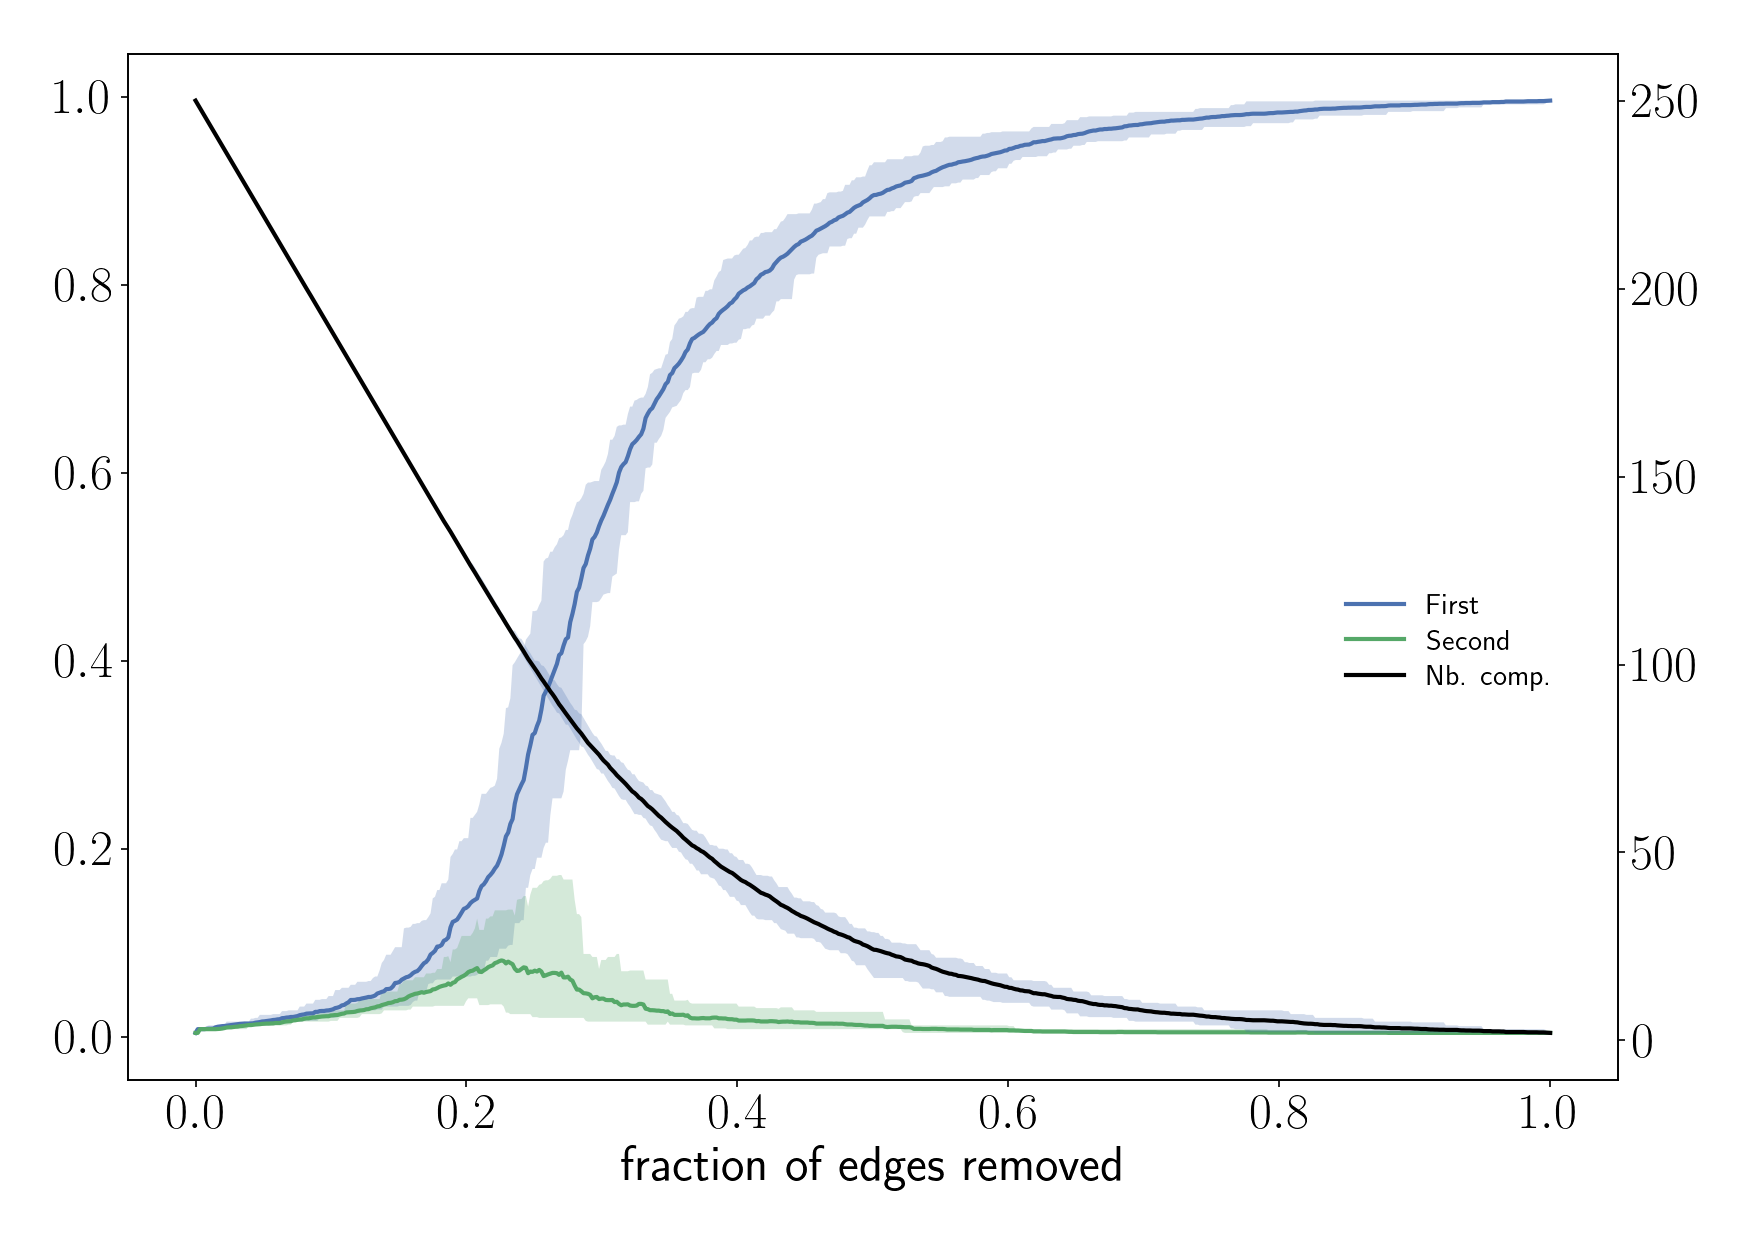

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.fill_between(x=np.array(pt.index),
                 y1=np.array(pt["perc05"]["frac_size_1st"]),
                 y2=np.array(pt["perc95"]["frac_size_1st"]),
                 linewidth=0, alpha=0.25, label="")
lns1 = ax1.plot(np.array(pt.index),np.array(pt["mean"]["frac_size_1st"]),
                 linestyle="-", linewidth=2, marker="None", label=r"First")


ax1.fill_between(x=np.array(pt.index),
                 y1=np.array(pt["perc05"]["frac_size_2nd"]),
                 y2=np.array(pt["perc95"]["frac_size_2nd"]),
                 linewidth=0, alpha=0.25, label="")
lns2 = ax1.plot(np.array(pt.index),np.array(pt["mean"]["frac_size_2nd"]),
                 linestyle="-", linewidth=2, marker="None", label="Second")


ax2.fill_between(x=np.array(pt.index),
                 y1=np.array(pt["perc05"]["nb_comp"]),
                 y2=np.array(pt["perc95"]["nb_comp"]),
                 linewidth=0, alpha=0.25, label="")
lns3 = ax2.plot(np.array(pt.index),np.array(pt["mean"]["nb_comp"]),
                 linestyle="-", linewidth=2, color="k", marker="None", label=r"Nb. comp.")


lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc="upper left", bbox_to_anchor=(0.8, 0.5), labelspacing=0.3)


ax1.set(xlabel=r"fraction of edges removed")

plt.tight_layout()
# fig.savefig("figures/pdf/" + synth_graph_name + "_number_of_triangles.pdf")